In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import os
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.formula.api as sm
import statsmodels.tools.eval_measures as sme
from PIL import Image


In [2]:
data = pd.read_csv('../data/happiness_complete.csv')
data

,country,continent,year,happiness_score,functioning_governments,gini_coefficient,population,avg_daily_income_$,women_parliament_%,democracy_index,approx_percentages
0,Afghanistan,Asia,2009,44.0,7.9,37.7,28394806,2.40,27.30,27.5,0.06
1,Angola,Africa,2009,0.0,32.1,43.5,22514275,3.60,36.50,33.4,0.08
2,Albania,Europe,2009,54.9,50.7,29.7,2927519,8.32,16.40,58.9,0.04
3,United Arab Emirates,Asia,2009,68.7,37.5,32.6,7917368,113.00,5.00,25.6,0.01
4,Argentina,South America,2009,64.2,53.5,43.6,40482786,18.90,39.30,67.3,0.09
...,...,...,...,...,...,...,...,...,...,...,...
1634,Vietnam,Asia,2019,53.5,32.1,35.7,96462108,11.60,26.70,30.8,0.06
1635,Yemen,Asia,2019,35.3,0.0,36.7,0,2.36,0.97,19.5,0.00
1636,South Africa,Africa,2019,48.1,75.0,63.3,58558267,11.00,45.30,72.4,0.10
1637,Zambia,Africa,2019,37.6,29.3,57.1,17861034,2.93,18.00,50.9,0.04


In [3]:
data = data.drop_duplicates()

## 1. How is the distribution of the Happiness score across: countries?

In [4]:
country_scores = data.groupby('country')['happiness_score'].mean().reset_index()

In [5]:
fig = px.bar(country_scores, x='country', y='happiness_score', title='Distribution of Happiness Scores across Countries')
fig.show(renderer="browser")

## 1.1 How is the distribution of the Happiness score across: continents?

In [6]:
continent_scores = data.groupby('continent')['happiness_score'].mean().reset_index()

In [7]:
fig = px.bar(continent_scores, x='continent', y='happiness_score', title='Distribution of Happiness Scores across Continents')
fig.show(renderer="browser")

## 2. How has happiness changed through the years?

In [8]:
os.makedirs('charts', exist_ok=True)

In [9]:
grouped_data = data.groupby('country')

In [10]:
for country, group in grouped_data:
    plt.figure()
    sns.lineplot(data=group, x='year', y='happiness_score')
    plt.title(f'Happiness Changes for {country}')
    plt.xlabel('Year')
    plt.ylabel('Happiness Score')

  
    filename = f'charts/{country}.png'
    plt.savefig(filename)
    plt.close()

In [11]:
image_files = []


for country in data['country'].unique():
    filename = f'charts/{country}.png'
    image_files.append(filename)

In [12]:
images = []
for filename in image_files:
    images.append(imageio.v2.imread(filename))
imageio.mimsave('happiness_animation.gif', images, duration=0.5)

In [13]:
fig = make_subplots(rows=1, cols=1)

In [14]:
for year in data['year'].unique():
    year_data = data[data['year'] == year]
    fig.add_trace(go.Scatter(x=year_data['continent'], y=year_data['happiness_score'],
                             mode='lines+markers', name=str(year)), row=1, col=1)

In [15]:
fig.update_layout(title='Happiness Changes Through the Years', xaxis_title='Continent',
                  yaxis_title='Happiness Score', showlegend=False)
fig.update_xaxes(type='category')
pio.write_html(fig, file='happiness_chart.html', auto_open=False, full_html=False)

In [16]:
data.dtypes

country                     object
continent                   object
year                         int64
happiness_score            float64
functioning_governments    float64
gini_coefficient           float64
population                   int64
avg_daily_income_$         float64
women_parliament_%         float64
democracy_index            float64
approx_percentages         float64
dtype: object


## 3. Which other variables correlate with the happiness score?

In [17]:
col_heatmap = ['happiness_score', 'functioning_governments', 'gini_coefficient', 'population', 'avg_daily_income_$', 'women_parliament_%', 'democracy_index']

In [18]:
correlation_matrix = data[col_heatmap].corr()

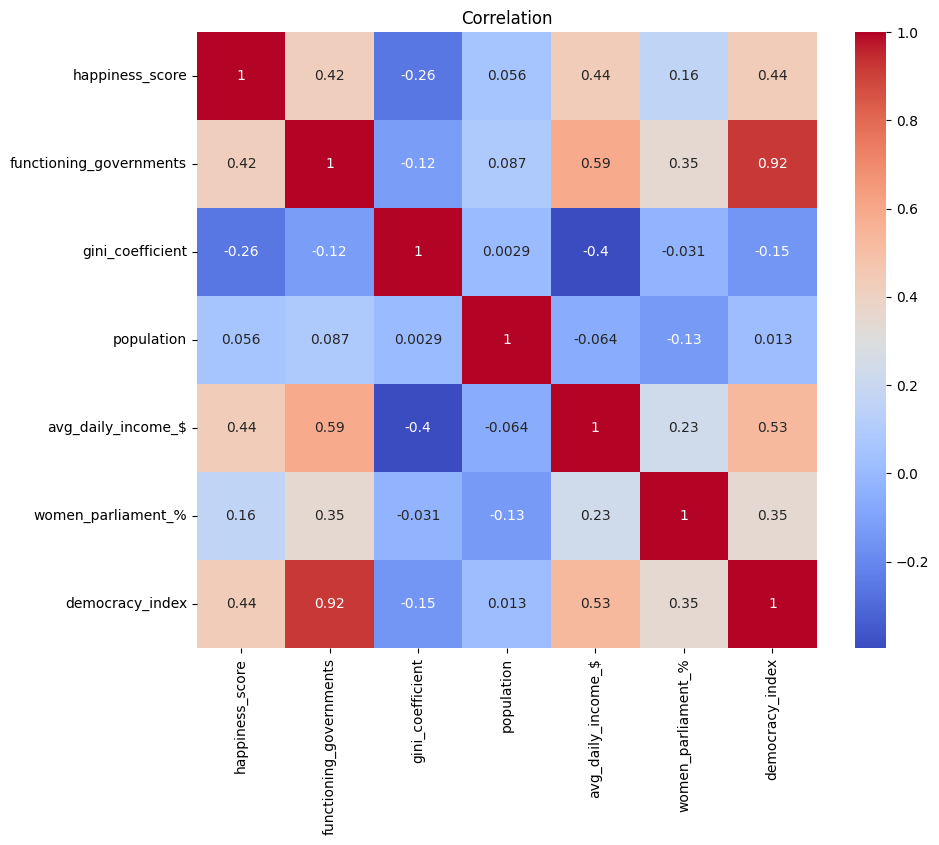

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.savefig('heatmap.png')
plt.show()

In [20]:
sorted_data = data.sort_values('happiness_score', ascending=False)

In [21]:
top_countries = sorted_data.head(5)['country']

In [22]:
top_countries

1385        Finland
1534        Finland
334         Denmark
1236        Finland
471     Switzerland
Name: country, dtype: object

In [23]:
sorted_data_2 = data.sort_values('happiness_score')

In [24]:
bottom_countries = sorted_data_2.head(3)['country']
bottom_countries 

1094     Gambia
279        Togo
1052    Burundi
Name: country, dtype: object

In [25]:
countries = ['Finland', 'Denmark', 'Switzerland']
filtered_data_one = data[(data['country'].isin(countries)) & (data['year'].between(2009, 2019))]

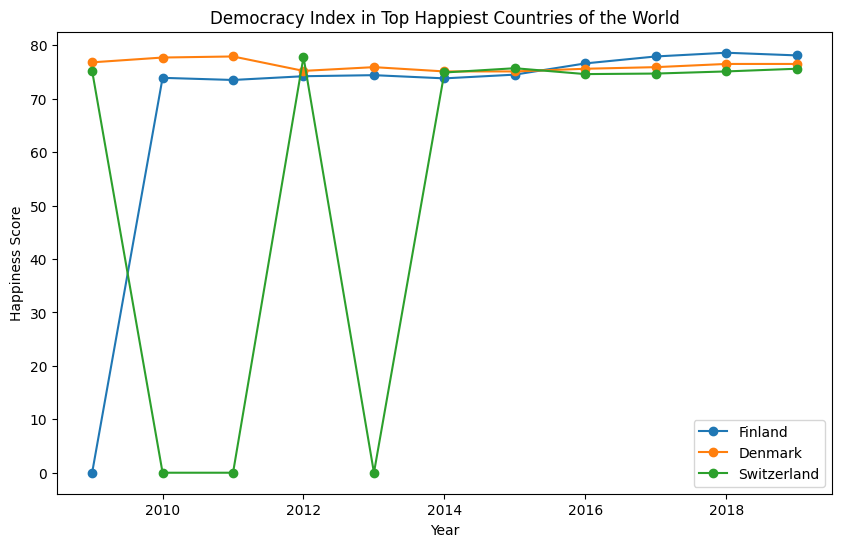

In [26]:

fig, ax = plt.subplots(figsize=(10, 6))

for country in countries:
    country_data = filtered_data_one[filtered_data_one['country'] == country]
    ax.plot(country_data['year'], country_data['happiness_score'], marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Happiness Score')
ax.set_title('Democracy Index in Top Happiest Countries of the World')

ax.legend(countries, loc='lower right')


plt.savefig('Top Countries Democracy Index .png')
plt.show()

In [27]:
countries = ['Gambia', 'Togo', 'Burundi']
filtered_data_two = data[(data['country'].isin(countries)) & (data['year'].between(2009, 2020))]

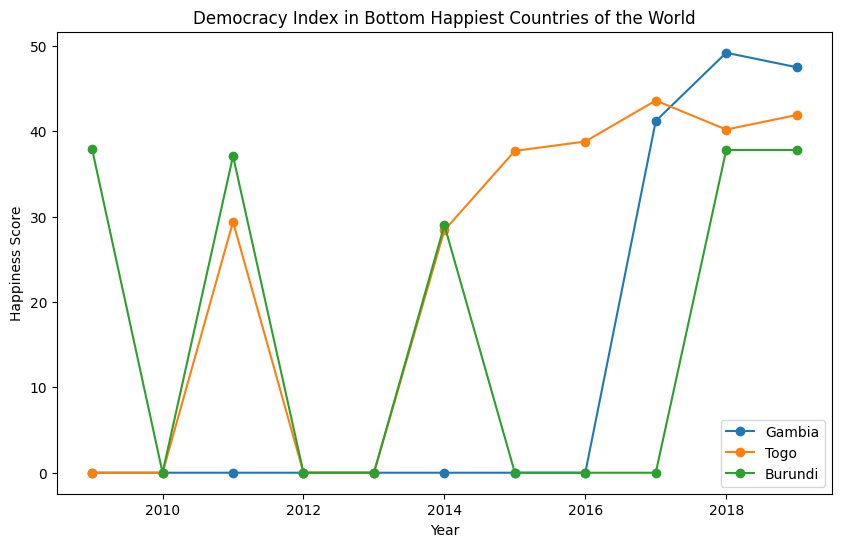

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

for country in countries:
    country_data = filtered_data_two[filtered_data_two['country'] == country]
    ax.plot(country_data['year'], country_data['happiness_score'], marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Happiness Score')
ax.set_title('Democracy Index in Bottom Happiest Countries of the World')

ax.legend(countries, loc='lower right')


plt.savefig('Bottom Countries Democracy Index .png')
plt.show()

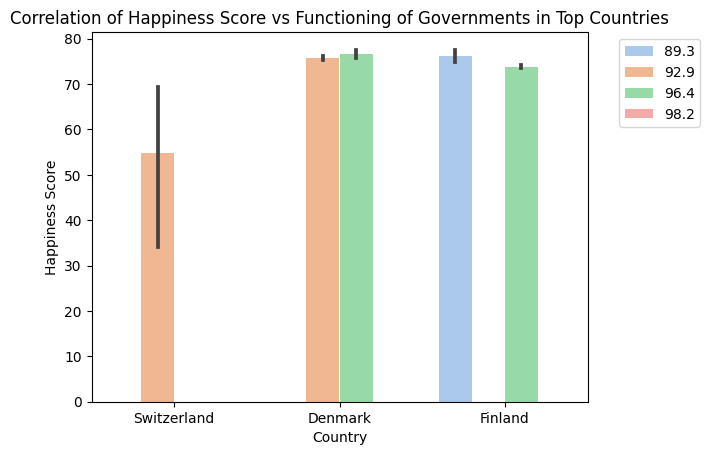

In [29]:
sns.set_palette("pastel")
sns.barplot(data=filtered_data_one, x='country', y='happiness_score', hue='functioning_governments')

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Correlation of Happiness Score vs Functioning of Governments in Top Countries')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('upper_countries with Function Governments.png')
plt.show()

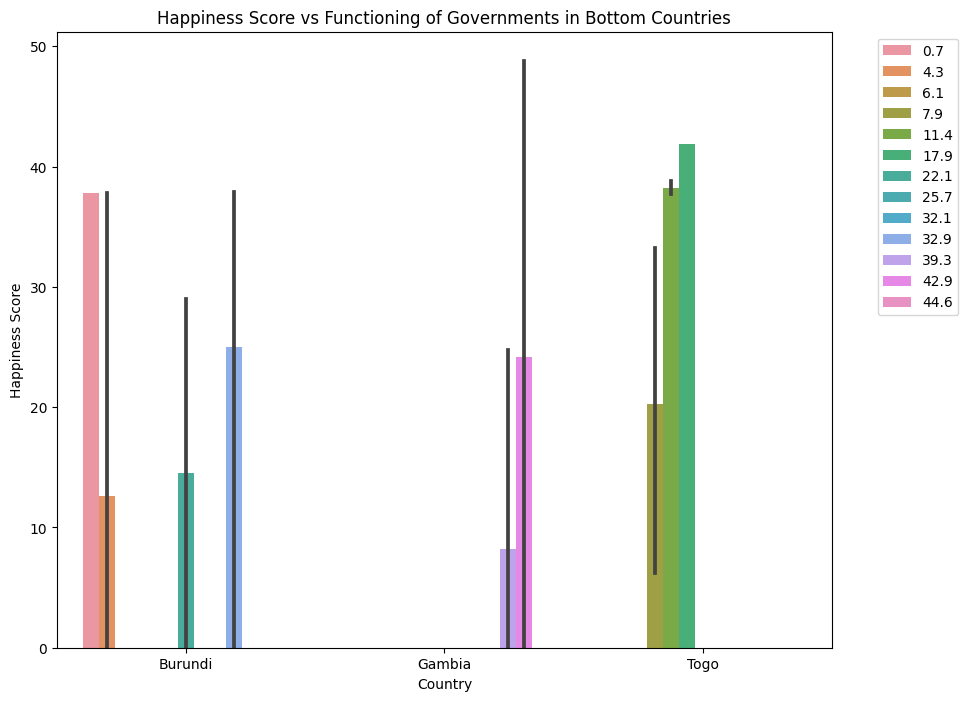

In [30]:
plt.figure(figsize=(10, 8))

sns.set_palette("pastel")
sns.barplot(data=filtered_data_two, x='country', y='happiness_score', hue='functioning_governments')

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs Functioning of Governments in Bottom Countries')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('bottom_countries with Function Governments.png')

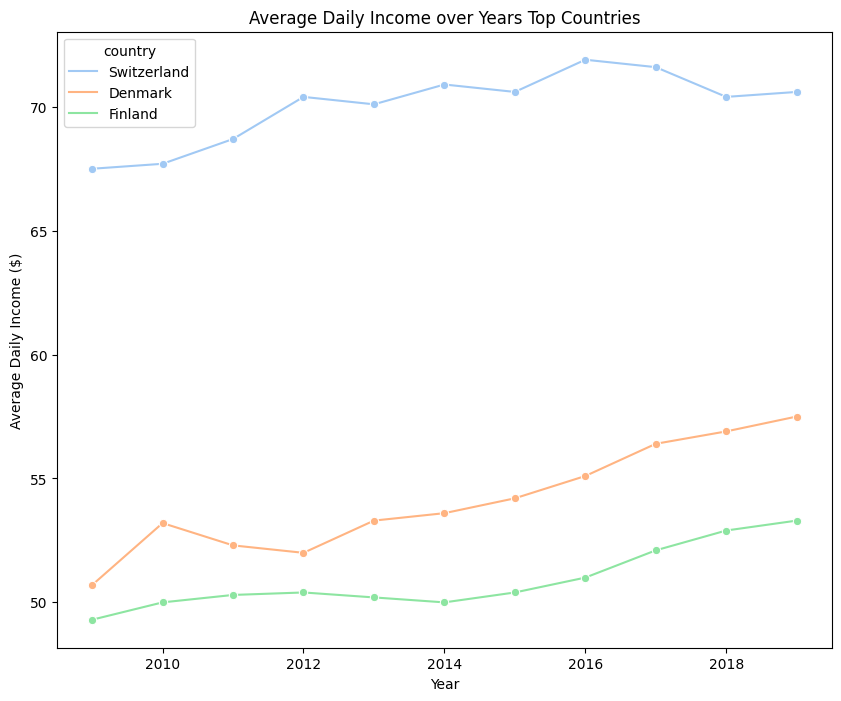

In [31]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=filtered_data_one, x='year', y='avg_daily_income_$', hue='country', marker='o')


plt.xlabel('Year')
plt.ylabel('Average Daily Income ($)')
plt.title('Average Daily Income over Years Top Countries')

plt.savefig('top_countries avg income .png')
plt.show()

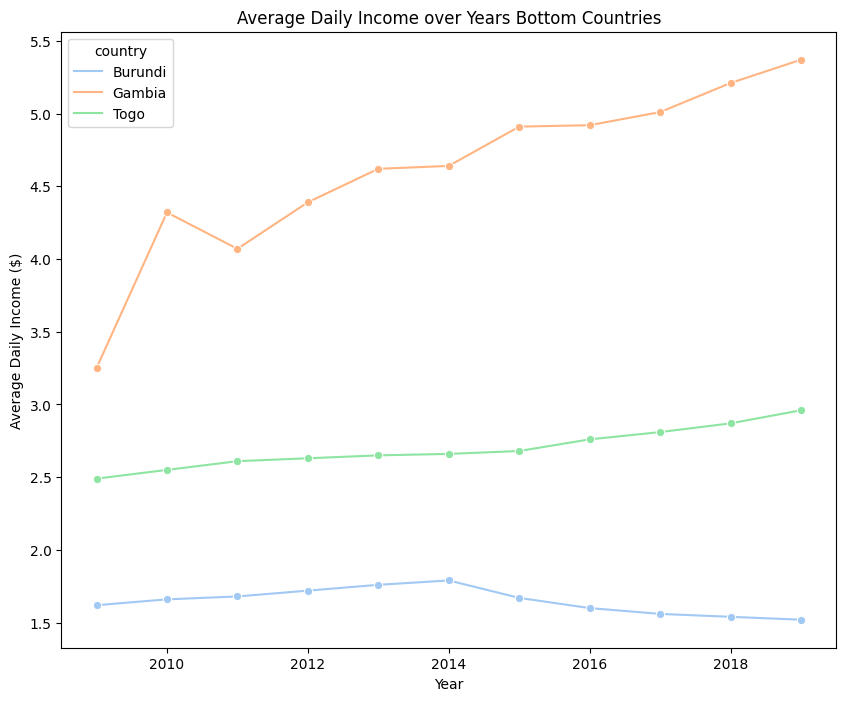

In [32]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=filtered_data_two, x='year', y='avg_daily_income_$', hue='country', marker='o')


plt.xlabel('Year')
plt.ylabel('Average Daily Income ($)')
plt.title('Average Daily Income over Years Bottom Countries')

plt.savefig('bottom_countries avg income .png')
plt.show()

In [33]:
df_filtered = data[(data['year'] >= 2009) & (data['year'] <= 2019)]

In [34]:
continent_populations = df_filtered.groupby('continent')['population'].sum()

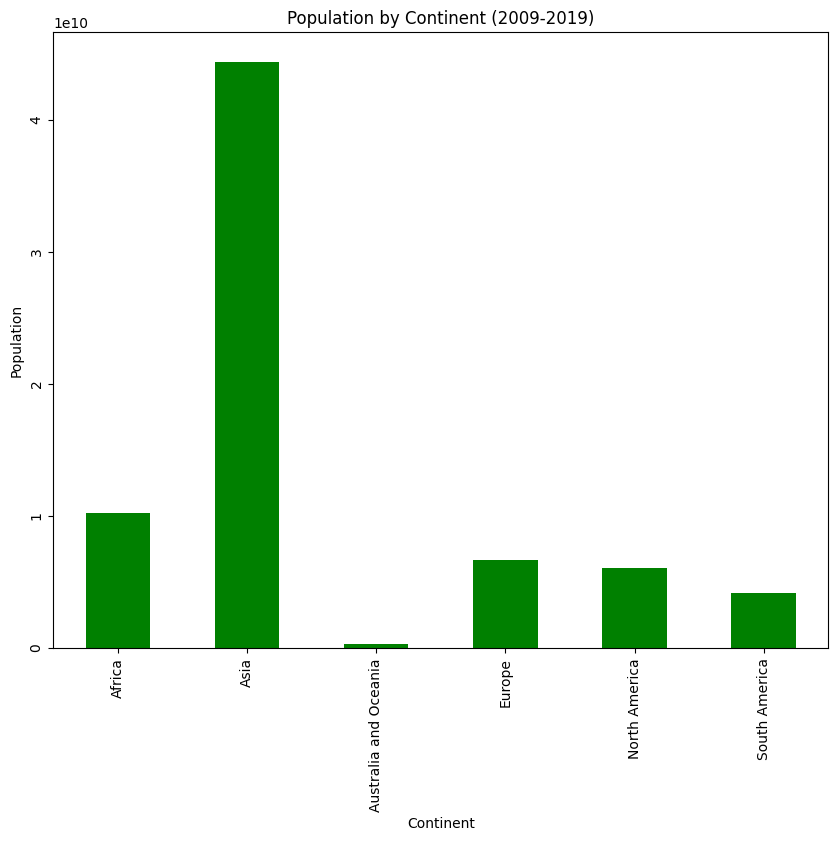

In [38]:
plt.figure(figsize=(10, 8))

ax = continent_populations.plot(kind='bar', color='green')

ax.set_title('Population by Continent (2009-2019)')
ax.set_xlabel('Continent')
ax.set_ylabel('Population')

plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.show()

In [40]:
df_filtered_two = data[(data['year'] >= 2009) & (data['year'] <= 2019) & (data['continent'] == 'Asia')]

In [41]:
country_avg_happiness = df_filtered_two.groupby('country')['happiness_score'].mean().reset_index()


In [42]:
country_avg_happiness = country_avg_happiness.sort_values('happiness_score', ascending=False)

In [47]:
top_asian_countries = country_avg_happiness.head(5)

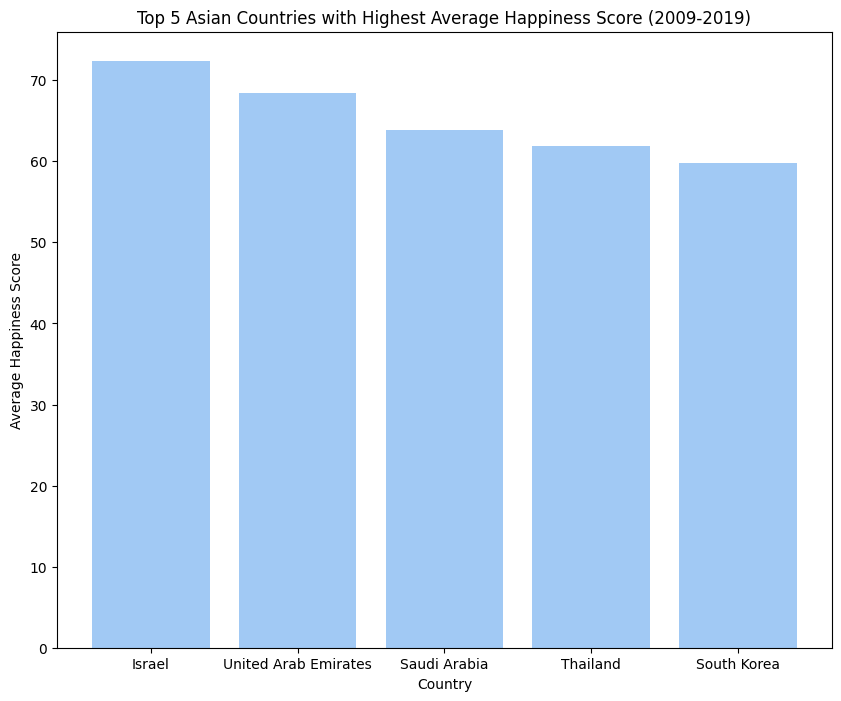

In [48]:
plt.figure(figsize=(10, 8))
plt.bar(top_asian_countries['country'], top_asian_countries['happiness_score'])

plt.title('Top 5 Asian Countries with Highest Average Happiness Score (2009-2019)')
plt.xlabel('Country')
plt.ylabel('Average Happiness Score')

plt.savefig('Happy Asian Countries.png')
plt.show()

In [49]:
df_china = data[data['country'] == 'China']

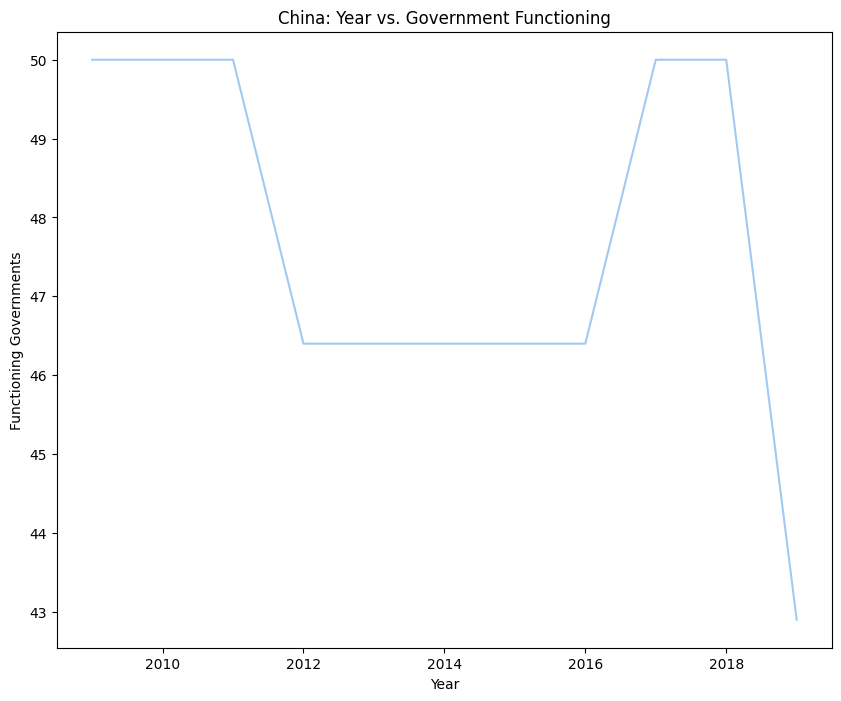

In [50]:
plt.figure(figsize=(10, 8))
plt.plot(df_china['year'], df_china['functioning_governments'])
plt.title('China: Year vs. Government Functioning')
plt.xlabel('Year')
plt.ylabel('Functioning Governments')

plt.savefig('China: Year vs. Government Functioning.png')
plt.show()

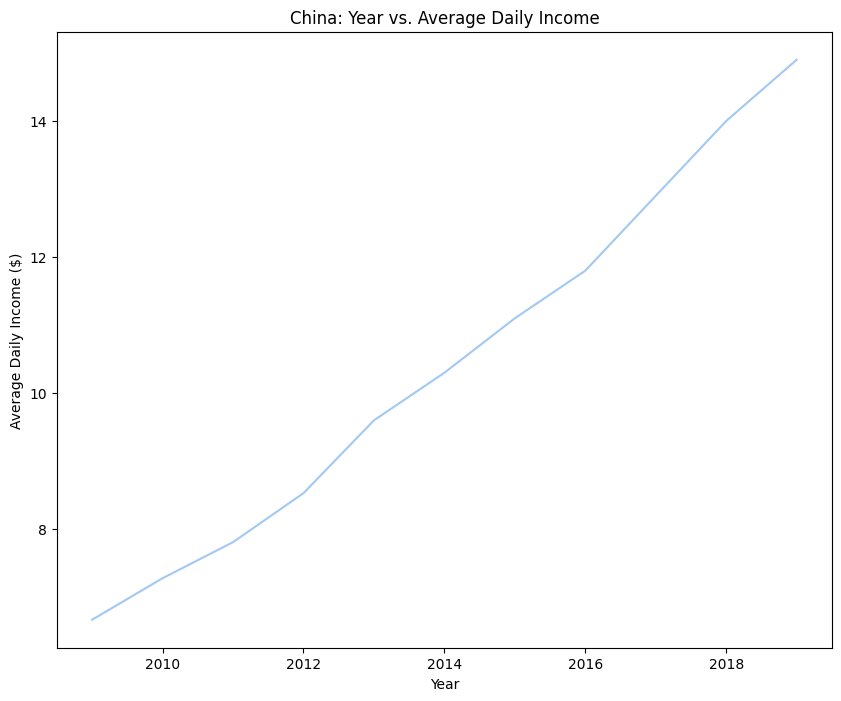

In [51]:
plt.figure(figsize=(10, 8))
plt.plot(df_china['year'], df_china['avg_daily_income_$'])
plt.title('China: Year vs. Average Daily Income')
plt.xlabel('Year')
plt.ylabel('Average Daily Income ($)')

plt.savefig('China: Year vs. Average Daily Income.png')
plt.show()

In [53]:
df_india = data[data['country'] == 'India']

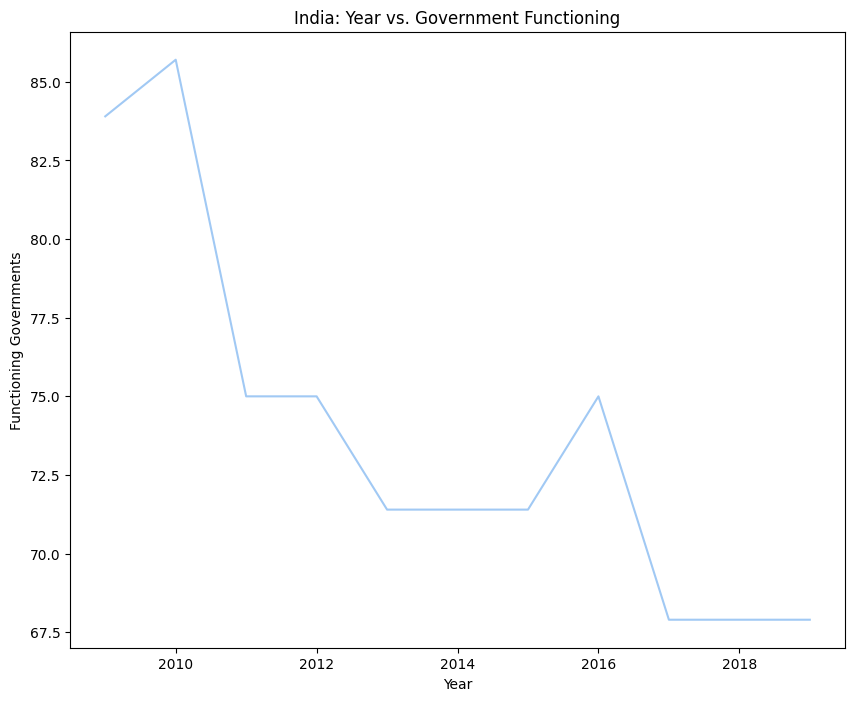

In [55]:
plt.figure(figsize=(10, 8))
plt.plot(df_india['year'], df_india['functioning_governments'])
plt.title('India: Year vs. Government Functioning')
plt.xlabel('Year')
plt.ylabel('Functioning Governments')

plt.savefig('India: Year vs. Government Functioning.png')
plt.show()

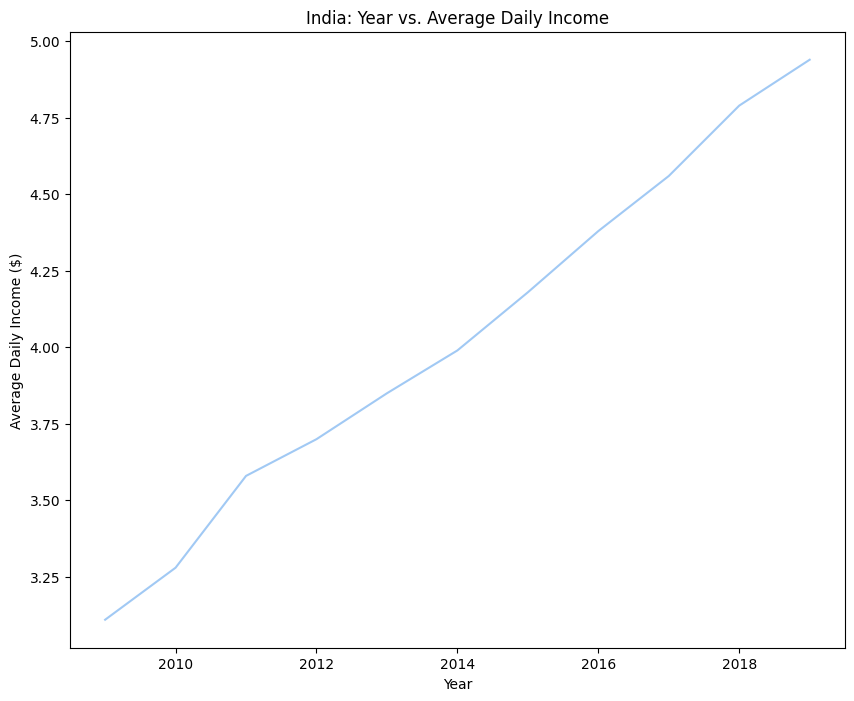

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(df_india['year'], df_india['avg_daily_income_$'])
plt.title('India: Year vs. Average Daily Income')
plt.xlabel('Year')
plt.ylabel('Average Daily Income ($)')

plt.savefig('India: Year vs. Average Daily Income.png')
plt.show()

In [57]:
df_uae = data[data['country'] == 'United Arab Emirates']


In [58]:
fig1 = px.bar(df_uae, x='year', y='avg_daily_income_$', color='year', title='United Arab Emirates: Year vs. Average Daily Income')

fig2 = px.bar(df_uae, x='year', y='functioning_governments', color='year', title='United Arab Emirates: Year vs. Government Functioning')


fig1.show(renderer='browser')
fig2.show(renderer='browser')

In [59]:
df_australia = data[data['country'] == 'Australia']

In [60]:
fig1 = px.bar(df_australia, x='year', y='avg_daily_income_$', color='year', title='Australia: Year vs. Average Daily Income')

fig2 = px.bar(df_australia, x='year', y='functioning_governments', color='year', title='Australia: Year vs. Government Functioning')

fig3 = px.bar(df_australia, x='year', y='democracy_index', color='year', title='Australia: Year vs. Democracy Index')


fig1.show(renderer='browser')
fig2.show(renderer='browser')
fig3.show(renderer='browser')

In [65]:
df_nz = data[data['country'] == 'New Zealand']

In [66]:
fig1 = px.line(df_nz, x='year', y='avg_daily_income_$', title='New Zealand: Year vs. Average Daily Income')

fig2 = px.line(df_nz, x='year', y='functioning_governments', title='New Zealand: Year vs. Government Functioning')

fig3 = px.line(df_nz, x='year', y='democracy_index', title='New Zealand: Year vs. Democracy Index')


fig1.show(renderer='browser')
fig2.show(renderer='browser')
fig3.show(renderer='browser')